<img src="http://library.ithaca.edu/sp/assets/users/_bsaunders/election2016.jpg"/>

In [1]:
from pandas import *
from numpy import *
import matplotlib.pyplot as plt
import string
import urllib.request
from bs4 import BeautifulSoup 

import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

Data from kaggle : https://www.kaggle.com/benhamner/clinton-trump-tweets

This script generates a dataset for this visualusation : http://bl.ocks.org/rhuille/89b683aecf83e14c5e620a9cd9bcc0fb

In [2]:
data = DataFrame.from_csv("tweets.csv")[["handle", "text", "time"]]
data.head()

,handle,text,time
id,,,
780925634159796224,HillaryClinton,The question in this election: Who can put the...,2016-09-28T00:22:34
780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",2016-09-27T23:45:00
780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,2016-09-27T23:26:40
780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",2016-09-27T23:08:41
780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,2016-09-27T22:30:27


In [3]:
print("start:", min(data["time"]), "end:", max(data["time"]))

start: 2016-01-05T03:36:53 end: 2016-09-28T00:22:34


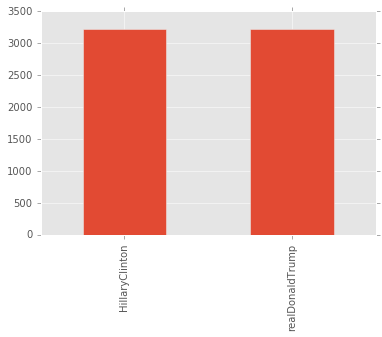

In [4]:
plt.figure()
data.handle.value_counts().plot.bar()
plt.show()

In [5]:
complete_HillaryClinton = []
for v,tweet in enumerate(data[data.handle == "HillaryClinton"].text) :
    complete_HillaryClinton+= [{"text": tweet.replace("\n", " "), "time": data[data.handle == "HillaryClinton"].time.iloc[v][:10]}]

complete_realDonaldTrump = []
for v,tweet in enumerate(data[data.handle == "realDonaldTrump"].text) :
    complete_realDonaldTrump+= [{"text": tweet.replace("\n", " "), "time":data[data.handle == "realDonaldTrump"].time.iloc[v][:10]} ]

Then, I scrape this [list of word from wikipedia](https://en.wikipedia.org/wiki/Most_common_words_in_English) to get some words I do not want to appear in my visualisation : 

In [6]:
most_common_word = []
from_wiki = BeautifulSoup(urllib.request.urlopen("https://en.wikipedia.org/wiki/Most_common_words_in_English").read(), 'html.parser')

for i in from_wiki.find_all("td"):
    if i.string :
        if not i.string.isdigit():
            most_common_word+=[i.string]

most_common_word = list(set(most_common_word)-set(["I","you", "we"]))  #I am interrested in the words "I", "you" and "we"
most_common_word +=["are", "has", "had", "is"] # but I am not interested in these

len(most_common_word)

101

In [7]:
most_common_word[0:5] #I will exclude this word from the visu

['look', 'work', 'not', 'way', 'some']

In [8]:
complete_realDonaldTrump[0]

{'text': 'Join me for a 3pm rally - tomorrow at the Mid-America Center in Council Bluffs, Iowa! Tickets:… https://t.co/dfzsbICiXc',
 'time': '2016-09-27'}

Exportation : 

In [9]:
exclude = set(string.punctuation + "”—“")

index_HillaryClinton = {}
for v,tweet in enumerate(complete_HillaryClinton): 
    tweet = tweet["text"]
    tweet = ''.join(ch for ch in tweet if ch not in exclude).lower()
    for word in [i for i in list(set(tweet.split(" ")) - set(most_common_word)) if i[:4] !="http"]:
        if word == "":
            continue
        if word not in index_HillaryClinton.keys():
            index_HillaryClinton[word]=[v]
        else:
            index_HillaryClinton[word]+=[v]
            
index_realDonaldTrump = {}
for v,tweet in enumerate(complete_realDonaldTrump):   
    tweet = tweet["text"]
    tweet = ''.join(ch for ch in tweet if ch not in exclude).lower()
    for word in [i for i in list(set(tweet.split(" ")) - set(most_common_word)) if i[:4] !="http"]:
        if word == "":
            continue
        if word not in index_realDonaldTrump.keys():
            index_realDonaldTrump[word]=[v]
        else:
            index_realDonaldTrump[word]+=[v]
len(index_HillaryClinton)

6568

In [10]:
len(index_realDonaldTrump)

6356

In [11]:
order_HillaryClinton=[]
for i in index_HillaryClinton.keys():
    order_HillaryClinton += [i]*len(index_HillaryClinton[i])
s = Series(order_HillaryClinton).value_counts(normalize=True, sort=True)*1000

order_HillaryClinton = []
for v,i in enumerate(s.index):
    order_HillaryClinton+=[{"word": i, "score": s.loc[i], "order": v+1}]
order_HillaryClinton[:10]

[{'order': 1, 'score': 21.952971301876776, 'word': 'trump'},
 {'order': 2, 'score': 21.078599756425067, 'word': 'hillary'},
 {'order': 3, 'score': 16.831652249945353, 'word': 'we'},
 {'order': 4, 'score': 12.928207850607377, 'word': 'donald'},
 {'order': 5, 'score': 12.428566967492115, 'word': 'you'},
 {'order': 6, 'score': 8.8061705649064734, 'word': 'i'},
 {'order': 7, 'score': 8.1816194610123976, 'word': 'president'},
 {'order': 8, 'score': 5.3399119382943514, 'word': 'america'},
 {'order': 9, 'score': 4.9339537207632009, 'word': 'trumps'},
 {'order': 10, 'score': 4.6529057240108678, 'word': 'more'}]

In [12]:
order_realDonaldTrump=[]
for i in index_realDonaldTrump.keys():
    order_realDonaldTrump += [i]*len(index_realDonaldTrump[i])
s = Series(order_realDonaldTrump).value_counts(normalize=True, sort=True)*1000

order_realDonaldTrump=[]
for v,i in enumerate(s.index):
    order_realDonaldTrump+=[{"word": i, "score": s.loc[i], "order": v+1}]
order_realDonaldTrump[:10]

[{'order': 1, 'score': 21.422502730913948, 'word': 'i'},
 {'order': 2, 'score': 20.967350406602744, 'word': 'you'},
 {'order': 3, 'score': 15.687583444592791, 'word': 'thank'},
 {'order': 4, 'score': 13.351134846461949, 'word': 'great'},
 {'order': 5, 'score': 10.559533924019906, 'word': 'trump2016'},
 {'order': 6, 'score': 10.195412064570943, 'word': 'trump'},
 {'order': 7, 'score': 9.8919771816968076, 'word': 'hillary'},
 {'order': 8, 'score': 9.770603228547154, 'word': 'realdonaldtrump'},
 {'order': 9, 'score': 7.8286199781526893, 'word': 'we'},
 {'order': 10, 'score': 7.6465590484282071, 'word': 'makeamericagreatagain'}]

In [13]:
with open('tweets.json', 'w') as f: #this data file is used in: 
     json.dump({"complete_HillaryClinton": complete_HillaryClinton, 
                "complete_realDonaldTrump": complete_realDonaldTrump,
                "index_HillaryClinton": index_HillaryClinton,
                "index_realDonaldTrump": index_realDonaldTrump,
                "order_HillaryClinton": order_HillaryClinton,
                "order_realDonaldTrump": order_realDonaldTrump}, f)